# T20I Player Performance EDA
This notebook explores T20I cricket player performance using the dataset `t20i_features_ready.csv`, which includes both raw and engineered features. We aim to extract meaningful insights to guide predictive modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/processed/t20i_features_ready.csv')
df.head()

,Player,Team,Mat,Inns,NO,Runs,Avg,SR,100s,50s,...,Econ,BBI,4w,5w,Runs_Per_Match,Boundary_Contribution_Score,Batting_Impact,Bowl_StrikeRate,Bowling_Impact,Match_Contribution
0,Rahmanullah Gurbaz,Afghanistan,55,55,1,1400,25.93,137.25,0,9,...,0.00,0,0,0,25.454545,450,192150.00,NaN,0.00,1.000000
1,Ibrahim Zadran,Afghanistan,31,30,2,677,24.17,113.57,0,4,...,0.00,0,0,0,21.838710,200,76886.89,NaN,0.00,0.967742
2,Mohammad Nabi,Afghanistan,113,98,16,1825,22.25,139.05,0,4,...,7.18,04-Oct,2,0,16.150442,200,253766.25,23.467416,639.02,1.752212
3,Najibullah Zadran,Afghanistan,97,84,18,1712,25.93,139.28,0,6,...,0.00,0,0,0,17.649485,300,238447.36,NaN,0.00,0.865979
4,Azmatullah Omarzai,Afghanistan,34,26,9,407,23.94,139.04,0,1,...,8.61,Mar-22,0,0,11.970588,50,56589.28,24.000000,172.20,1.588235


## Feature Overview
These are the features present in the dataset, including raw and engineered ones:

In [3]:
df.columns.tolist()

['Player',
 'Team',
 'Mat',
 'Inns',
 'NO',
 'Runs',
 'Avg',
 'SR',
 '100s',
 '50s',
 'Bowl_Inns',
 'Overs',
 'Wkts',
 'Bowl_Avg',
 'Econ',
 'BBI',
 '4w',
 '5w',
 'Runs_Per_Match',
 'Boundary_Contribution_Score',
 'Batting_Impact',
 'Bowl_StrikeRate',
 'Bowling_Impact',
 'Match_Contribution']

## Distributions of Key Metrics
These plots help us understand the spread and skew of major performance metrics.

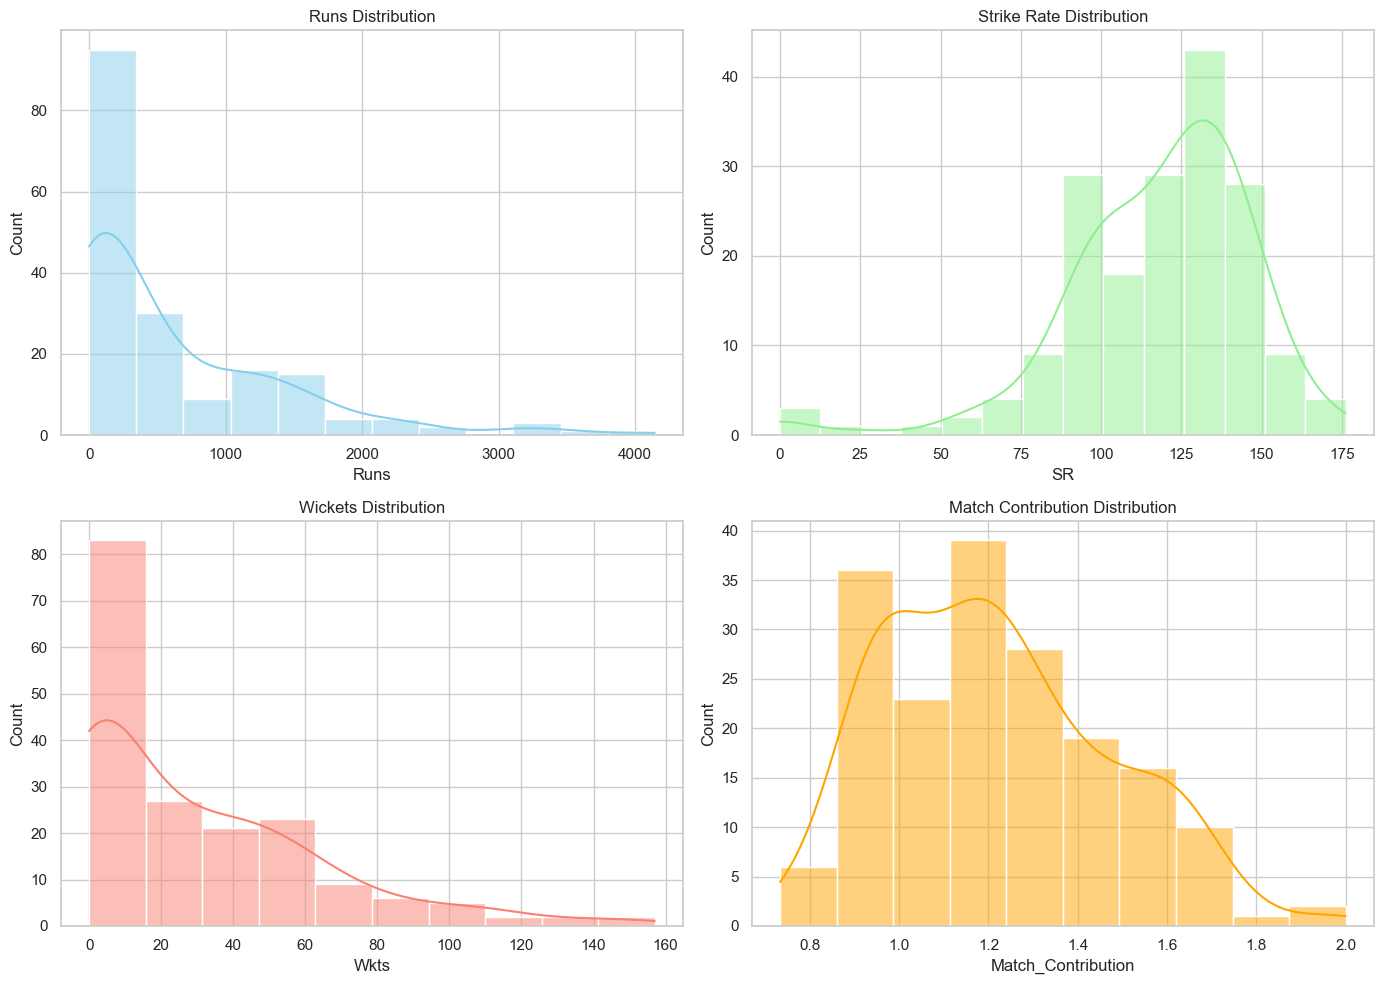

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['Runs'], kde=True, ax=axes[0,0], color='skyblue').set_title('Runs Distribution')
sns.histplot(df['SR'], kde=True, ax=axes[0,1], color='lightgreen').set_title('Strike Rate Distribution')
sns.histplot(df['Wkts'], kde=True, ax=axes[1,0], color='salmon').set_title('Wickets Distribution')
sns.histplot(df['Match_Contribution'], kde=True, ax=axes[1,1], color='orange').set_title('Match Contribution Distribution')
plt.tight_layout()
plt.show()

**Insight:** From the plots, we observe a long-tail distribution in runs and wickets. Most players have modest performance, but a few stand out as top contributors. 'Match_Contribution' captures this all-round impact effectively.

## Top 10 Batters by Runs

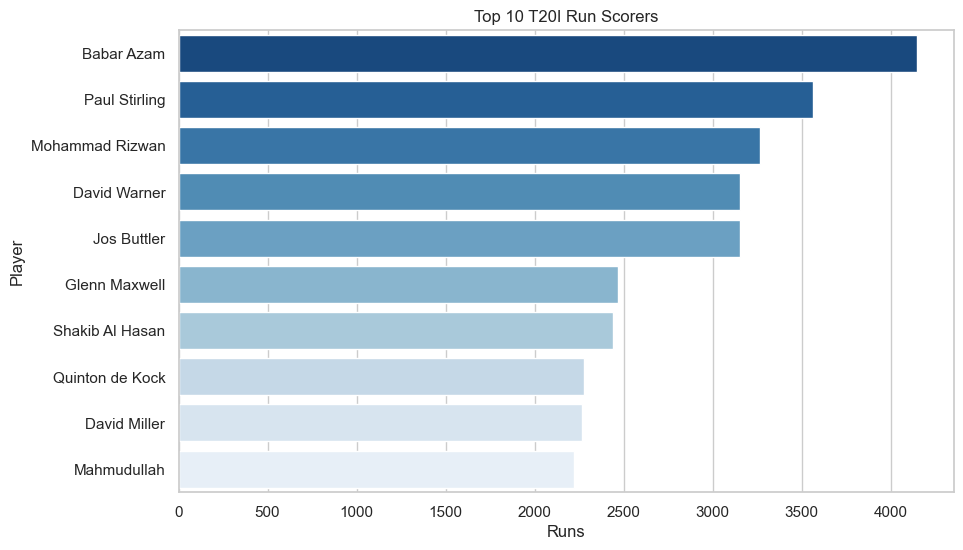

In [5]:
top_runs = df.sort_values('Runs', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_runs, x='Runs', y='Player', hue='Player', dodge=False, palette='Blues_r', legend=False)
plt.title('Top 10 T20I Run Scorers')
plt.show()

## Top 10 Bowlers by Wickets

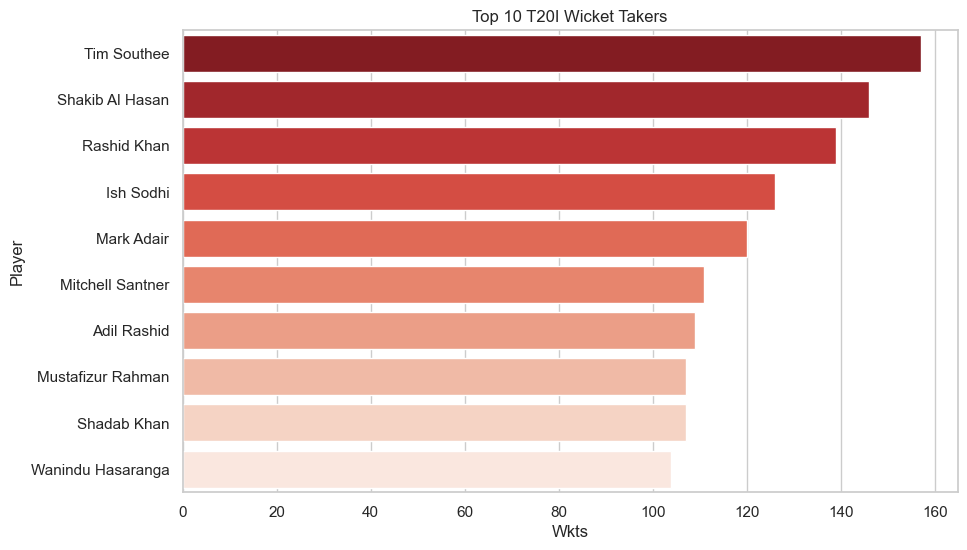

In [6]:
top_wickets = df.sort_values('Wkts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_wickets, x='Wkts', y='Player', hue='Player', dodge=False, palette='Reds_r', legend=False)
plt.title('Top 10 T20I Wicket Takers')
plt.show()

**Insight:** This helps identify consistent contributors. Such players might be prioritized in future prediction models due to their historical performance trends.

## Correlation Heatmap of Engineered Features

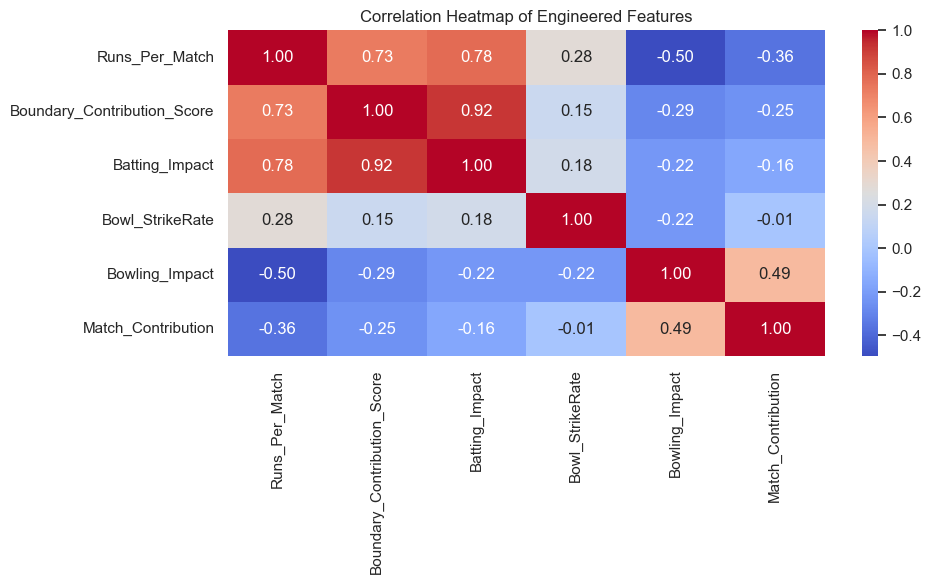

In [7]:
features_of_interest = [
    'Runs_Per_Match', 'Boundary_Contribution_Score', 'Batting_Impact',
    'Bowl_StrikeRate', 'Bowling_Impact', 'Match_Contribution'
]
valid_features = [f for f in features_of_interest if f in df.columns]
plt.figure(figsize=(10, 6))
sns.heatmap(df[valid_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Engineered Features')
plt.tight_layout()
plt.show()

**Insight:**
- `Runs_Per_Match` and `Batting_Impact` show high correlation, confirming that aggressive and high-volume scorers dominate.
- `Bowling_Impact` has mild negative correlation with economy, suggesting more effective bowlers also tend to be economical.
- `Match_Contribution` serves as a valuable aggregate for identifying all-rounders.